In [599]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linalg # what does this do?

### GEOL 3910 – Earth and Planetary Inference
Extended Laboratory Exercise: Model Complexity and Fit in linear inversions 


This laboratory exercise is intended to give you experience with extended applications of the inverse theory to Earth and Planetary observations.

In [640]:
df_keeling = pd.read_csv('co2_mm_mlo.csv')
df_keeling.head()

,year,month,decimal date,average,interpolated,trend,ndays
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1


In [641]:
df_keeling.columns = ['year', 'month','date', 'avg_co2', 'co2', 'trend', 'ndays']

In [642]:
date = df_keeling.date
co2 = df_keeling.co2

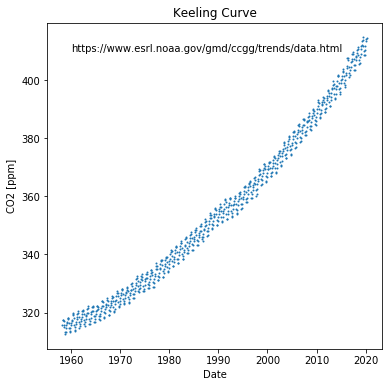

In [643]:
fig1, axs1 = plt.subplots(1, figsize=(6, 6))
axs1.plot(date, co2, marker = 'o', markersize = 1, linestyle = 'none')
axs1.set(title='Keeling Curve',\
            ylabel='CO2 [ppm]', \
        xlabel='Date')
axs1.annotate('https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html', xy = (1960, 410.))

plt.show()

#### Setting up the linear inverse problem

In order to set up the linear inverse we need to put everything in terms of the following linear algebraic framework:
\begin{equation*}
\mathbf{Gm} = \mathbf{d} 
\end{equation*}
where $\mathbf{G}$ is the data kernel, $\mathbf{m}$ is the vector of model parameters, and $\mathbf{d}$ is the vector of observed data.

##### Setting up data vector

The data vector for this problem is a column vector that consists of the observed CO2 concentrations.

In [644]:
# Setting up data vector - first we make a numpy array out of the co2 dataframe, 
# and then transpose to turn it into a column vector - the [] outside of the first command are
# important as python traditionally interprets vectors as 0-D arrays (so vector is equal
# to its transpose which is weird).

d_obs = [np.array(co2)]
d_obs = np.transpose(d_obs)
print(len(d_obs))

745


##### Setting up data kernel

The first inverse model is just to calculate the average CO2 concentration over the last 60 years. The data kernel for this problem is a matrix that has 1 column: one filled with ones. 

In [645]:
# Setting up data kernel - we make a numpy array of ones equal in length to 
# the date array, and then transpose to turn it into a column vector.  
# This forms the data kernel - G.

ones = [np.ones(len(date))]
ones = np.transpose(ones)

G = ones

##### Solving the linear inverse problem for estimated model parameters

The vector of estimated model parameters can be estimated through the following matrix product:

\begin{equation*}
\mathbf{m_{est}} = (\mathbf{G}^T\mathbf{G})^{-1}\mathbf{G}^T \mathbf{d_{obs}} 
\end{equation*}

In [646]:
# Setting up to solve m_est = (G^T G)^(-1) G^T d_obs - here we form the product of the 
# transpose of G with G = G^T G, which gives us a 1X1 matrix 

GTG = np.dot(np.transpose(G),G) 
print(GTG) 

[[745.]]


In [647]:
# Setting up to solve m_est = (G^T G)^(-1) G^T d_obs - here we take the inverse of the
# the product of the transpose of G with G = (G^T G)^-1, which gives us a 1X1 matrix 

invGTG = linalg.inv(GTG) 
print(invGTG)

[[0.00134228]]


In [648]:
# Setting up to solve m_est = (G^T G)^(-1) G^T d_obs - here we form the product of the 
# inverse of the product of the transpose of G  with the transpose of the
# data kernel - (G^T G)^-1 G^T, which gives us a 1X745 matrix.

invGTGGT = np.dot(invGTG,np.transpose(G))


In [649]:
# Solving for m_est = (G^T G)^(-1) G^T d_obs - here we form the product of the 
# inverse of the product of the transpose of G with the transpose of the
# data kernel with the vector of observed data - (G^T G)^-1 G^T d_obs, 
# which gives us a 1X1 matrix.

m_est = np.dot(invGTGGT,d_obs) 

print(m_est)


[[355.03245638]]


In [650]:
# Results of the linear inversion - here we calculate the 'predicted' observations using our
# estimates for the model parameters.

d_pred = np.dot(G,m_est)

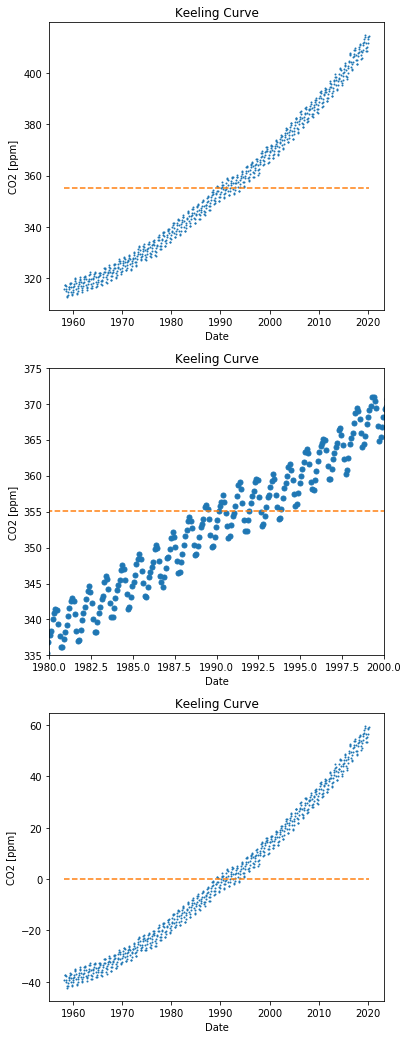

In [651]:
# Results of the linear inversion - here we plot the 'predicted' observations using our
# estimates for the model parameters, as well as the 'error' or 'residuals' in those 
# predictions.

fig2, axs2 = plt.subplots(3, figsize=(6, 18))
axs2[0].plot(date, d_obs, marker = 'o', markersize = 1, linestyle = 'none')
axs2[0].plot(date, d_pred, linestyle = '--')
axs2[0].set(title='Keeling Curve',\
            ylabel='CO2 [ppm]', \
        xlabel='Date')

axs2[1].plot(date, d_obs, marker = 'o', markersize = 5, linestyle = 'none')
axs2[1].plot(date, d_pred, linestyle = '--')
axs2[1].set(title='Keeling Curve',\
            ylabel='CO2 [ppm]', \
        xlabel='Date')
axs2[1].set_xlim([1980, 2000])
axs2[1].set_ylim([335, 375])

residuals_obs = d_obs - d_pred
residuals_pred = d_pred - d_pred

axs2[2].plot(date, residuals_obs, marker = 'o', markersize = 1, linestyle = 'none')
axs2[2].plot(date, residuals_pred, linestyle = '--')
axs2[2].set(title='Keeling Curve',\
            ylabel='CO2 [ppm]', \
        xlabel='Date')


plt.show()

In [652]:
uncertainty_d = 1.0

chi_square_1 = np.dot(np.transpose(residuals_obs),residuals_obs)/uncertainty_d**2
red_chi_square_1 = chi_square_1/len(residuals_obs)
print('chi squared:', np.round(chi_square_1,1))
print('reduced chi squared:', np.round(red_chi_square_1,1))

chi squared: [[605160.4]]
reduced chi squared: [[812.3]]


##### Setting up data kernel

The second inverse model is to calculate the linear trend in CO2 concentration over the last 60 years. The data kernel for this problem is a matrix that has 2 columns: one filled with dates and one filled with ones. 

In [653]:
# Setting up data kernel - we make a numpy array of ones equal in length to 
# the date array, and then transpose to turn it into a column vector.  
# This forms the data kernel - G.

time = [np.array(date)]
time = np.transpose(time)

ones = [np.ones(len(date))]
ones = np.transpose(ones)

G = np.hstack((time,ones))

##### Solving the linear inverse problem for estimated model parameters

The vector of estimated model parameters can be estimated through the following matrix product:

\begin{equation*}
\mathbf{m_{est}} = (\mathbf{G}^T\mathbf{G})^{-1}\mathbf{G}^T \mathbf{d_{obs}} 
\end{equation*}

In [654]:
# Setting up to solve m_est = (G^T G)^(-1) G^T d_obs - here we form the product of the 
# transpose of G with G = G^T G, which gives us a 2X2 matrix 

GTG = np.dot(np.transpose(G),G) 
print(GTG) 

[[2.94816688e+09 1.48196021e+06]
 [1.48196021e+06 7.45000000e+02]]


In [656]:
# Setting up to solve m_est = (G^T G)^(-1) G^T d_obs - here we take the inverse of the
# the product of the transpose of G with G = (G^T G)^-1, which gives us a 2X2 matrix 

invGTG = linalg.inv(GTG) 
print(invGTG)

[[ 4.17903217e-06 -8.31296562e-03]
 [-8.31296562e-03  1.65375628e+01]]


In [657]:
# Setting up to solve m_est = (G^T G)^(-1) G^T d_obs - here we form the product of the 
# inverse of the product of the transpose of G  with the transpose of the
# data kernel - (G^T G)^-1 G^T, which gives us a 2X745 matrix.

invGTGGT = np.dot(invGTG,np.transpose(G))


In [658]:
# Solving for m_est = (G^T G)^(-1) G^T d_obs - here we form the product of the 
# inverse of the product of the transpose of G with the transpose of the
# data kernel with the vector od observed data - (G^T G)^-1 G^T d_obs, 
# which gives us a 2X1 matrix.

m_est = np.dot(invGTGGT,d_obs) 

print(m_est)


[[ 1.57195037e+00]
 [-2.77190432e+03]]


In [659]:
# Results of the linear inversion - here we calculate the 'predicted' observations using our
# estimates for the model parameters.

d_pred = np.dot(G,m_est)

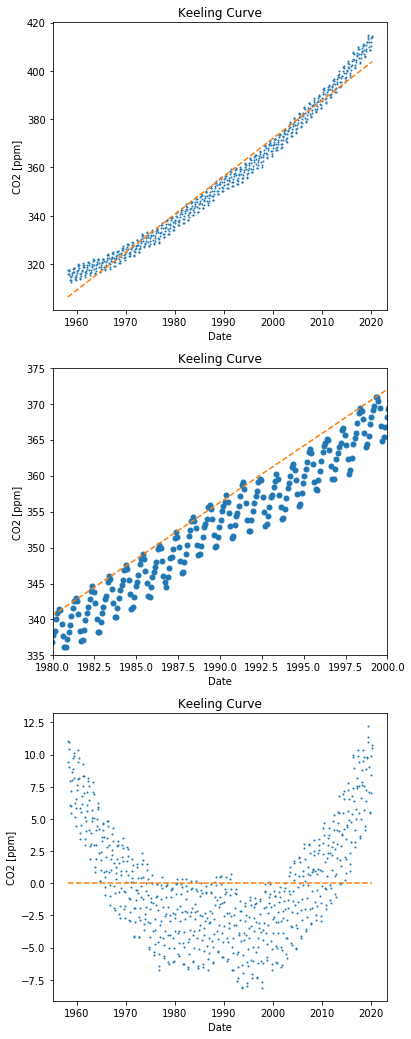

In [660]:
# Results of the linear inversion - here we plot the 'predicted' observations using our
# estimates for the model parameters, as well as the 'error' or 'residuals' in those 
# predictions.

fig4, axs4 = plt.subplots(3, figsize=(6, 18))
axs4[0].plot(date, d_obs, marker = 'o', markersize = 1, linestyle = 'none')
axs4[0].plot(date, d_pred, linestyle = '--')
axs4[0].set(title='Keeling Curve',\
            ylabel='CO2 [ppm]', \
        xlabel='Date')

axs4[1].plot(date, d_obs, marker = 'o', markersize = 5, linestyle = 'none')
axs4[1].plot(date, d_pred, linestyle = '--')
axs4[1].set(title='Keeling Curve',\
            ylabel='CO2 [ppm]', \
        xlabel='Date')
axs4[1].set_xlim([1980, 2000])
axs4[1].set_ylim([335, 375])


residuals_obs = d_obs - d_pred
residuals_pred = d_pred - d_pred

axs4[2].plot(date, residuals_obs, marker = 'o', markersize = 1, linestyle = 'none')
axs4[2].plot(date, residuals_pred, linestyle = '--')
axs4[2].set(title='Keeling Curve',\
            ylabel='CO2 [ppm]', \
        xlabel='Date')

plt.show()

In [661]:
chi_square_2 = np.dot(np.transpose(residuals_obs),residuals_obs)/uncertainty_d**2
red_chi_square_2 = chi_square_2/len(residuals_obs)
print('chi squared:', np.round(chi_square_2,1))
print('reduced chi squared:', np.round(red_chi_square_2,1))

chi squared: [[13868.4]]
reduced chi squared: [[18.6]]


##### Setting up data kernel

The third inverse model is to calculate the parabolic and linear trends in CO2 concentration over the last 60 years. The data kernel for this problem is a matrix that has 3 columns: one filled with dates squared, one filled with dates and one filled with ones. 

In [663]:
# Setting up data kernel - we make a numpy array of ones equal in length to 
# the date array, and then transpose to turn it into a column vector.  
# This forms the data kernel - G.

time = [np.array(date)]
time = np.transpose(time)

ones = [np.ones(len(date))]
ones = np.transpose(ones)

G = np.hstack((time**2,time,ones))

##### Solving the linear inverse problem for estimated model parameters

The vector of estimated model parameters can be estimated through the following matrix product:

\begin{equation*}
\mathbf{m_{est}} = (\mathbf{G}^T\mathbf{G})^{-1}\mathbf{G}^T \mathbf{d_{obs}} 
\end{equation*}

In [665]:
# Setting up to solve m_est = (G^T G)^(-1) G^T d_obs - here we form the product of the 
# transpose of G with G = G^T G, which gives us a 3X3 matrix 

GTG = np.dot(np.transpose(G),G) 
print(GTG) 

[[1.16704828e+16 5.86547013e+12 2.94816688e+09]
 [5.86547013e+12 2.94816688e+09 1.48196021e+06]
 [2.94816688e+09 1.48196021e+06 7.45000000e+02]]


In [666]:
# Setting up to solve m_est = (G^T G)^(-1) G^T d_obs - here we take the inverse of the
# the product of the transpose of G with G = (G^T G)^-1, which gives us a 3X3 matrix 

invGTG = linalg.inv(GTG) 
print(invGTG)

[[ 1.62637299e-08 -6.47038941e-05  6.43495388e-02]
 [-6.47038941e-05  2.57423229e-01 -2.56017590e+02]
 [ 6.43495388e-02 -2.56017590e+02  2.54623763e+05]]


In [667]:
# Setting up to solve m_est = (G^T G)^(-1) G^T d_obs - here we form the product of the 
# inverse of the product of the transpose of G  with the transpose of the
# data kernel - (G^T G)^-1 G^T, which gives us a 3X745matrix.

invGTGGT = np.dot(invGTG,np.transpose(G))


In [668]:
# Solving for m_est = (G^T G)^(-1) G^T d_obs - here we form the product of the 
# inverse of the product of the transpose of G with the transpose of the
# data kernel with the vector od observed data - (G^T G)^-1 G^T d_obs, 
# which gives us a 3X1 matrix.

m_est = np.dot(invGTGGT,d_obs) 

print(m_est)


[[ 1.28861036e-02]
 [-4.96943388e+01]
 [ 4.82136215e+04]]


In [669]:
# Results of the linear inversion - here we calculate the 'predicted' observations using our
# estimates for the model parameters.

d_pred = np.dot(G,m_est)

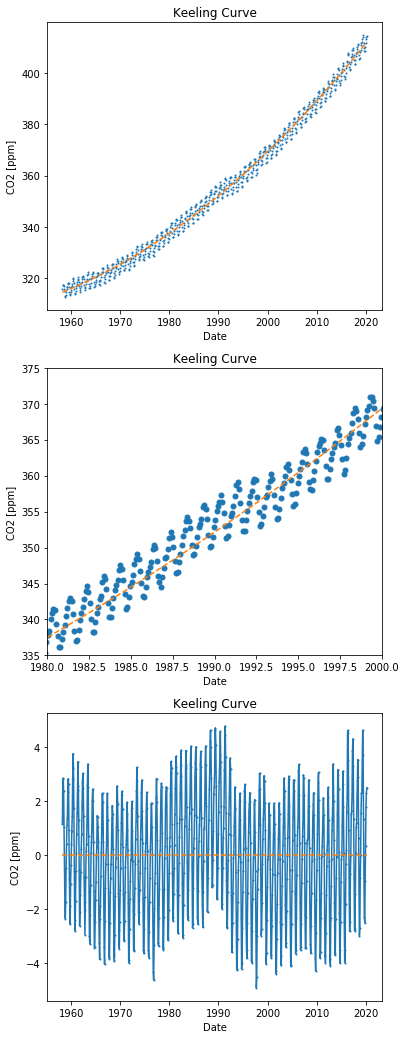

In [671]:
# Results of the linear inversion - here we plot the 'predicted' observations using our
# estimates for the model parameters, as well as the 'error' or 'residuals' in those 
# predictions.

fig5, axs5 = plt.subplots(3, figsize=(6, 18))
axs5[0].plot(date, d_obs, marker = 'o', markersize = 1, linestyle = 'none')
axs5[0].plot(date, d_pred, linestyle = '--')
axs5[0].set(title='Keeling Curve',\
            ylabel='CO2 [ppm]', \
        xlabel='Date')

axs5[1].plot(date, d_obs, marker = 'o', markersize = 5, linestyle = 'none')
axs5[1].plot(date, d_pred, linestyle = '--')
axs5[1].set(title='Keeling Curve',\
            ylabel='CO2 [ppm]', \
        xlabel='Date')
axs5[1].set_xlim([1980, 2000])
axs5[1].set_ylim([335, 375])

residuals_obs = d_obs - d_pred
residuals_pred = d_pred - d_pred

axs5[2].plot(date, residuals_obs, marker = 'o', markersize = 1, linestyle = '-')
axs5[2].plot(date, residuals_pred, linestyle = '--')
axs5[2].set(title='Keeling Curve',\
            ylabel='CO2 [ppm]', \
        xlabel='Date')

plt.show()

In [672]:
chi_square_3 = np.dot(np.transpose(residuals_obs),residuals_obs)/uncertainty_d**2
red_chi_square_3 = chi_square_3/len(residuals_obs)
print('chi squared:', np.round(chi_square_3,1))
print('reduced chi squared:', np.round(red_chi_square_3,1))

chi squared: [[3658.5]]
reduced chi squared: [[4.9]]


##### Setting up data kernel

The fourth inverse model is calculate the seasonal, parabolic, and linear trend in CO2 concentration over the last 60 years. The data kernel for this problem is a matrix that has 4 columns: one filled with a seasonal sine function of dates, one filled with dates squared, one filled with dates and one filled with ones and as many rows as there are observations. 

I note that fitting for the parameters of the seasonal sine function of dates will require an iterative procedure as the model is not linear with respect to frequency of the sinusoidal variations or their offset. Here I simply take these parameters from a fully iterative fit by Krinos and Maurais (2019), and leave the mutiplicative (linear) component as the 4th parameter that we will fit.

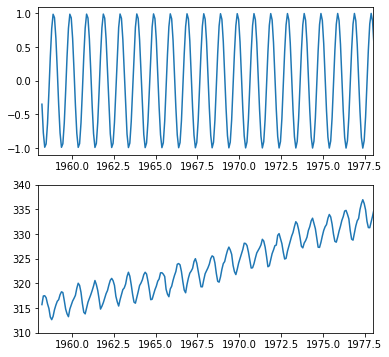

In [674]:
frequency = 1.001
offset = -23.367
seasons = np.sin((2.*np.pi*frequency)*(date-offset))

fig6, axs6 = plt.subplots(2, figsize=(6, 6))
axs6[0].plot(date, seasons, linestyle = '-')
axs6[0].set_xlim([1958, 1978])

axs6[1].plot(date, co2, linestyle = '-')
axs6[1].set_xlim([1958, 1978])
axs6[1].set_ylim([310, 340])

plt.show()

In [675]:
# Setting up data kernel - we make a numpy array of ones equal in length to 
# the date array, and then transpose to turn it into a column vector.  
# This forms the data kernel - G.

time = [np.array(date)]
time = np.transpose(time)

ones = [np.ones(len(date))]
ones = np.transpose(ones)

seasonal = [np.array(seasons)]
seasonal = np.transpose(seasonal)

G = np.hstack((seasonal, time**2, time, ones))

##### Solving the linear inverse problem for estimated model parameters

The vector of estimated model parameters can be estimated through the following matrix product:

\begin{equation*}
\mathbf{m_{est}} = (\mathbf{G}^T\mathbf{G})^{-1}\mathbf{G}^T \mathbf{d_{obs}} 
\end{equation*}

In [676]:
# Setting up to solve m_est = (G^T G)^(-1) G^T d_obs - here we form the product of the 
# transpose of G with G = G^T G, which gives us a 4X4 matrix 

GTG = np.dot(np.transpose(G),G) 
print(GTG) 

[[ 3.72143208e+02 -3.16646743e+06 -1.68269907e+03 -8.91820112e-01]
 [-3.16646743e+06  1.16704828e+16  5.86547013e+12  2.94816688e+09]
 [-1.68269907e+03  5.86547013e+12  2.94816688e+09  1.48196021e+06]
 [-8.91820112e-01  2.94816688e+09  1.48196021e+06  7.45000000e+02]]


In [677]:
# Setting up to solve m_est = (G^T G)^(-1) G^T d_obs - here we take the inverse of the
# the product of the transpose of G with G = (G^T G)^-1, which gives us a 4X4 matrix 

invGTG = linalg.inv(GTG) 
print(invGTG)

[[ 2.68743788e-03  2.58034408e-08 -1.03682409e-04  1.04137922e-01]
 [ 2.58034529e-08  1.62639776e-08 -6.47048892e-05  6.43505383e-02]
 [-1.03682457e-04 -6.47048892e-05  2.57427228e-01 -2.56021607e+02]
 [ 1.04137970e-01  6.43505383e-02 -2.56021607e+02  2.54627797e+05]]


In [678]:
# Setting up to solve m_est = (G^T G)^(-1) G^T d_obs - here we form the product of the 
# inverse of the product of the transpose of G  with the transpose of the
# data kernel - (G^T G)^-1 G^T, which gives us a 4X745 matrix.

invGTGGT = np.dot(invGTG,np.transpose(G))


In [679]:
# Solving for m_est = (G^T G)^(-1) G^T d_obs - here we form the product of the 
# inverse of the product of the transpose of G with the transpose of the
# data kernel with the vector od observed data - (G^T G)^-1 G^T d_obs, 
# which gives us a 4X1 matrix.

m_est = np.dot(invGTGGT,d_obs) 

print(m_est)


[[-2.61754817e+00]
 [ 1.28609711e-02]
 [-4.95933524e+01]
 [ 4.81121915e+04]]


In [680]:
# Results of the linear inversion - here we calculate the 'predicted' observations using our
# estimates for the model parameters.

d_pred = np.dot(G,m_est)

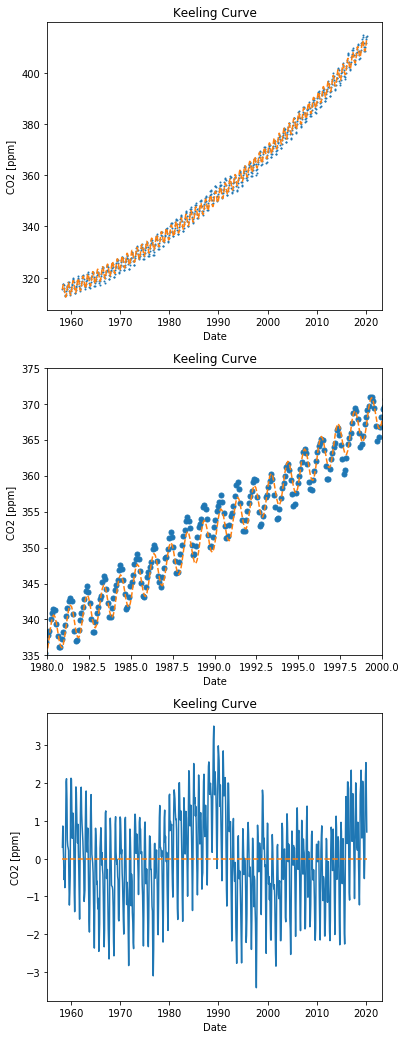

In [681]:
# Results of the linear inversion - here we plot the 'predicted' observations using our
# estimates for the model parameters, as well as the 'error' or 'residuals' in those 
# predictions.

fig7, axs7 = plt.subplots(3, figsize=(6, 18))
axs7[0].plot(date, d_obs, marker = 'o', markersize = 1, linestyle = 'none')
axs7[0].plot(date, d_pred, linestyle = '--')
axs7[0].set(title='Keeling Curve',\
            ylabel='CO2 [ppm]', \
        xlabel='Date')

axs7[1].plot(date, d_obs, marker = 'o', markersize = 5, linestyle = 'none')
axs7[1].plot(date, d_pred, linestyle = '--')
axs7[1].set(title='Keeling Curve',\
            ylabel='CO2 [ppm]', \
        xlabel='Date')
axs7[1].set_xlim([1980, 2000])
axs7[1].set_ylim([335, 375])

residuals_obs = d_obs - d_pred
residuals_pred = d_pred - d_pred

axs7[2].plot(date, residuals_obs, linestyle = '-')
axs7[2].plot(date, residuals_pred, linestyle = '--')
axs7[2].set(title='Keeling Curve',\
            ylabel='CO2 [ppm]', \
        xlabel='Date')

plt.show()

In [682]:
chi_square_4 = np.dot(np.transpose(residuals_obs),residuals_obs)/uncertainty_d**2
red_chi_square_4 = chi_square_4/len(residuals_obs)
print('chi squared:', np.round(chi_square_4,1))
print('reduced chi squared:', np.round(red_chi_square_4,1))

chi squared: [[1109.]]
reduced chi squared: [[1.5]]


In [683]:
Fit = np.array([red_chi_square_1,red_chi_square_2,red_chi_square_3,red_chi_square_4])
Fit = Fit.reshape(4)
Complexity = np.array([1,2,3,4])
print('Fit:',Fit)
print('Complexity:',Complexity)

Fit: [812.2957839   18.61535354   4.91074116   1.48862573]
Complexity: [1 2 3 4]


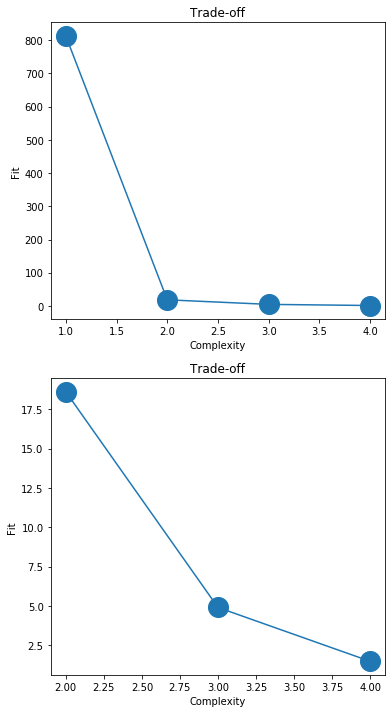

In [684]:
fig8, axs8 = plt.subplots(2, figsize=(6, 12))
axs8[0].plot(Complexity, Fit, marker = 'o', markersize = 20, linestyle = '-')
axs8[0].set(title='Trade-off',\
            ylabel='Fit', \
        xlabel='Complexity')

axs8[1].plot(Complexity[1:5], Fit[1:5], marker = 'o', markersize = 20, linestyle = '-')
axs8[1].set(title='Trade-off',\
            ylabel='Fit', \
        xlabel='Complexity')
plt.show()